# Теоретическое домашнее задание 2 по курсу «Байесовский выбор моделей»
Выполнил Фирсов Сергей из Б05-105

## Библиотеки

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy.stats import norm, t
import scipy.stats as stats
import statsmodels.stats.multitest as smm

In [5]:
np.random.seed(42)

## Задача 1

#### Гипотезы
$ H_0: m = 0 $  
$ H_1: m \neq 0 $

#### Статистика 

Оценка среднего по выборке $ \bar{x}$ для нормально распределённой выборки $ \{x_i\} $ будет нормально распределена:
$$
\bar{x} \sim \mathcal{N}(m, \frac{\sigma^2}{n}).
$$
Так как не известна дисперсия, то стандартизируем статистику:
$$
Z = \frac{\bar{x}}{S / \sqrt{n}},
$$
где $ S^2 $ — выборочная дисперсия:
$
S^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2.
$  

Так как $ n > 100 $ - статистика $ Z $ будет распределена приближённо как стандартное нормальное распределение $ \mathcal{N}(0, 1) $.

#### Критическая область

Для уровня значимости $\alpha$ критическая область для двусторонней альтернативной гипотезы $H_1: m \neq 0$ задается:

$$
\Omega = \{ Z : |Z| > z_{\alpha/2} \},
$$

где $z_{\alpha/2}$ — квантиль стандартного нормального распределения, соответствующая уровню значимости $\alpha$.

#### Мощность
Мощность критерия  — это вероятность отвергнуть нулевую гипотезу  H_0 , если истинное значение параметра $ m \neq 0 $. Это вероятность того, что статистика Z попадет в критическую область при истинном значении m .

Для истинного значения  m  распределение статистики при альтернативной гипотезе будет:
$
Z \sim \mathcal{N}\left( \frac{m}{\sigma/\sqrt{n}}, 1 \right).
$

Тогда вероятность отвергнуть $ H_0 $ при альтернативной гипотезе, то есть мощность критерия, будет:
$
W(m, \sigma) = P\left( |Z| > z_{\alpha/2} \mid m \right).
$

Это можно выразить как:$ W(m, \sigma) = P\left( Z > z_{\alpha/2} \mid m \right) + P\left( Z < -z_{\alpha/2} \mid m \right).$

Подставив распределение  Z  при $ m \neq 0 $, получим: $Z = \frac{\bar{x}}{\sigma/\sqrt{n}} \sim \mathcal{N}\left( \frac{m}{\sigma/\sqrt{n}}, 1 \right).$

Теперь оцениваем вероятность для нормального распределения:
$$
W(m, \sigma) = 1 - \Phi\left( z_{\alpha/2} - \frac{m\sqrt{n}}{\sigma} \right) + \Phi\left( -z_{\alpha/2} - \frac{m\sqrt{n}}{\sigma} \right),
$$
где $ \Phi(\cdot) $ — функция распределения стандартного нормального распределения.


In [16]:
n = 150
alpha = 0.05
true_mean = 0
m_alternative = 1
sigma = 1

sample = np.random.normal(loc=true_mean, scale=sigma, size=n)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1)
Z = sample_mean / (sample_std / np.sqrt(n))

z_critical = norm.ppf(1 - alpha / 2)

# Проверка гипотезы
print(f"Z = {Z:.4f}, Критическое значение = {z_critical:.4f}")
print("Гипотеза H0 отвергнута" if abs(Z) > z_critical else "Гипотеза H0 не отвергнута")

# Оценка мощности
Z_alt = (m_alternative * np.sqrt(n)) / sigma
power = 1 - norm.cdf(z_critical - Z_alt) + norm.cdf(-z_critical - Z_alt)
print(f"Мощность критерия при m = {m_alternative}: {power:.4f}")

Z = 0.8062, Критическое значение = 1.9600
Гипотеза H0 не отвергнута
Мощность критерия при m = 1: 1.0000


## Задача 2

## Задача 3

### а) Доказательство
В наших обозначениях метрики выражаются формулами  
$Accuracy$:
$$ACC = \frac{\sum\limits_{i=1}^{m_2} |y_i = \hat{y}_i |}{N}$$
и  $ASY(P)$  
$ P = \left( \begin{matrix} p_{00} & p_{01} \\  p_{10} & p_{11}\end{matrix} \right)$ , для неё штраф $ASY(P) = \sum\limits_{i=1}^{m_2}p_{yi\hat{y}i}$


Нетрудно заметить что легко свести $ACY(P)$ к $ACC$, заменив диагональные элементы матрицы $Р$ на 1: $p_{00} = p_{11} = \frac{1}{N}$, а остальные на 0: $\quad p_{01} = p_{10} = 0$. Тогда 
$$
\sum\limits_{i=1}^{m_2} p_{y_i\hat{y}_i} = \frac{\sum\limits_{i=1}^{m_2} |y_i = \hat{y}_i |}{N}
$$

### б) 
### часть 1. Оптимальный прогноз в терминах ACC
 - Казалось бы надо просто предсказывать самый часто встречающийся класс, но давайте разбираться.
 - Из условия $P(y_j = 1) = p$. Введём также $\hat{p}_j = P(\hat{y}_j = 1)$.
 - Для того чтобы максимизировать ACC - нужно минимизировать количество ошибок.  
 - Из условия выборка шумовая,значит единственная доступная информация — это вероятность того, что $y_j = 1$.

Запишем матожидание АСС, для предсказанного $\hat{y}_j$

$$
\mathbf{E}(ACC) = p \cdot P(\hat{y}_j = 1) + (1 - p) \cdot P(\hat{y}_j = 0) = p \cdot \hat{p}_j + (1 - p) \cdot (1 - \hat{p}_j)
$$

Максимум достигается, если: $\hat{p}_j = 1$, при $p \geq 0.5$, и $= 0$ при $ p < 0.5 $

То есть оптимальный прогноз в терминах ACC заключается в том, чтобы всегда предсказывать класс 1, если вероятность $p \geq 0.5$, и класс 0, если $p < 0.5$. То есть предсказывать самый часто встречающийся класс.

### часть 2. Оптимальный прогноз в терминах ASY(P)
- Из условия $P(y_j = 1) = p$. Введём также $\hat{p}_j = P(\hat{y}_j = 1)$.
Для ASY(P) пишем аналогично матожидание
$$
\mathbf{E}(ASY(P)) = \sum\limits_{i=1}^{N} \left( (1 - p) \cdot p_{00} \cdot (1 - \hat{p}_i) + (1 - p) \cdot p_{01} \cdot \hat{p}_i + p \cdot p_{10} \cdot (1 - \hat{p}_i) + p \cdot p_{11} \cdot \hat{p}_i \right) =  \sum\limits_{i=1}^{N} \left( \hat{p}_i \cdot \left( p_{01}(1 - p) + p_{11} p \right) + (1 - \hat{p}_i) \cdot \left( p_{00}(1 - p) + p_{10} p \right) \right)
$$

Для максимизации ASY(P) нужно выбрать такие значения $\hat{p}_i$, которые минимизируют количество ошибок. Оптимальное значение $\hat{p}_i$ будет следующим:

$$
\hat{p}_i = \begin{cases}
1, \;\; p_{00}(1 - p) + p_{10} p \leq p_{01}(1 - p) + p_{11} p \\
0, \;\; p_{00}(1 - p) + p_{10} p > p_{01}(1 - p) + p_{11} p
\end{cases}
$$

Оптимальный прогноз для максимизации ASY(P) зависит от значений вероятностей $p_{ij}$ и параметра $p$.

### часть 3.
Возьмём просто долю объектов с меткой класса 1 в обучающей выборке:

$$
\hat{p} = \frac{1}{N} \sum\limits_{i=1}^{N} \mathbb{1}(y_i = 1)
$$

внутри индикатор метки класса.

#### Что делать, если $\hat{p}$ не отличается значимо от 0.5?

Если оценка $\hat{p}$ близка к 0.5 - это означает, что классы 0 и 1 встречаются в данных примерно с одинаковой частотой. Значит мы ничего не можем сделать кроме как и оставить такое р как и получается. Ну или взять 0.5, но принципиальных отличий не будет.

## Задача 4

На статистике было. Для a) и  b) есть центральные статистики как раз по случаю:  (переобозначим выборки за X и Y, так привычнее)  
### Пункт **a)**
  $H_0: \mu_j^0 = \mu_j^1$, против  $H_1: \mu_j^0 \neq \mu_j^1$ на уровне значимости $\alpha = 0.05$. $\ \ \sigma_i^2 $ известны и равны, тогда $$G = \frac{(\overline{X} - \overline{Y}) - \theta}{\sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}} \sim \mathcal{N}(0,1)$$
Это уравнение возникает из системы
$$ (\overline{X}-\mu_x) \sim \mathcal{N}(0,\frac{\sigma_x^2}{n_x}) $$
$$(\overline{Y}-\mu_y) \sim \mathcal{N}(0,\frac{\sigma_y^2}{n_y}) $$ 

Ведь отсюда разность $(\overline{X} - \overline{Y}) \sim \mathcal{N}(0,\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y})$  


Возвращаясь к условию - считаем статистику $G = \frac{(\overline{X} - \overline{Y}) - \theta}{\sqrt{\frac{\sigma^2}{n_x} + \frac{\sigma^2}{n_y}}}$, и сравниваем с $\alpha = 0.05$ альфа кванnилем нормального распределения: критическая область $\Omega = {|G| >= \mathcal{F}_{N(0,1)}(\alpha)= 1.96}$. Если попали в область - основная гипотеза отвергается, не попали - принимается.

### Пункт **б)** 
Теперь $ \sigma_i^2 $ неизвестны, но равны, тогда 
 $$G = \frac{\frac{(\overline{X} - \overline{Y})}{\sqrt{\frac{1}{n_x} + \frac{1}{n_y}}}}{\sqrt{\frac{\sum(x_i-\overline{x})^2+\sum(y_i-\overline{y})^2}{n_x+n_y-2}}} = \frac{\overline{X} - \overline{Y}}{\sqrt{S^2 \left( \frac{1}{n_x} + \frac{1}{n_y} \right)}} \sim \mathcal{St}(n_x+n_y-2)$$
Это продолжение предыдущего пункта с оценкой общей дисперсии $S^2$ и несмещённых выборочных $S_1,S_2$, после -  сокращение общей части $\sigma^2$ в числителе и знаменателе. $S^2 = \frac{(m_0 - 1) S_0^2 + (m_1 - 1) S_1^2}{m_0 + m_1 - 2}$
где: $S_0^2$ и $S_1^2$ — выборочные дисперсии признака $j$ в классах 0 и 1.  

Аналогично определяется критическая область, теперь через квантили распределения Стьюдента:  $\Omega = {|G| >= \mathcal{St}_{n_x+n_y-2}(\alpha)}$. Если попали в область - основная гипотеза отвергается, не попали - принимается.


### Пункт в) 

In [7]:
n = 100  
m1_values = [100, 500, 1000]
m2_values = [100, 500, 1000]
alpha = 0.05
j_special = 12

In [9]:
import numpy as np

def generate_data(n, m1, m2, j_special):
    X0 = [np.random.normal(0, j, m1) for j in range(1, n + 1)]
    X1 = [np.random.normal(0, j, m2) for j in range(1, n + 1)]
    X1[j_special] = np.random.normal(1, j_special + 1, m2)
    return np.array(X0), np.array(X1)

X0, X1 = generate_data(n, m1_values[1], m2_values[1], j_special)
X0.shape, X1.shape

((100, 500), (100, 500))

In [11]:
def test(x1, x2):
    t_stat, p_value = stats.ttest_ind(x1, x2, equal_var=False)
    return p_value
    
def G_test(x1, x2):  # в задании реализацию просят, но можно использовать функцию выше, так как эта статистика популярная и за нас сделана
    m1, m2 = len(x1), len(x2)  # на всякий случай вот реализация, вдруг принципиально в задании
    S1 = np.sum((x1-np.mean(x1))**2) / (m1 - 1)
    S2 = np.sum((x2-np.mean(x2))**2) / (m2 - 1)
    S = ((m1-1)*S1 + (m2-1)*S2) / (m1+m2-2)
    G = (np.mean(x1) - np.mean(x2)) / ((S * (1/m1 + 1/m2))**0.5)
    return np.minimum(sc.stats.t.cdf(G, m1 + m2 - 2), 1-sc.stats.t.cdf(G, m1 + m2 - 2)) * 2

p_vals = [test(X0[i], X1[i]) for i in range(n)]
print(p_vals) 

[0.8843584811263212, 0.5957260979910091, 0.10684470586104682, 0.3848338574297979, 0.29308732367354123, 0.6788715419807896, 0.44274720165005665, 0.6797536978124381, 0.0848958320126086, 0.12185355696221313, 0.23040865269587957, 0.5099275272340222, 0.17563336753389489, 0.740076090886514, 0.8628780702103647, 0.9272551543744696, 0.9334882331799037, 0.25764875984013474, 0.8621210994178491, 0.0397086682583811, 0.5487523395538836, 0.11209202505151741, 0.7434054925525383, 0.6084542530664603, 0.9482010501184212, 0.60092380768347, 0.2697986287914528, 0.6792803703206581, 0.4840579766526246, 0.5961805091046106, 0.9980367609175231, 0.9849306701273267, 0.8220044524249261, 0.6290503754181052, 0.25669017602881816, 0.8350783179150061, 0.38285453822867455, 0.15308571181125158, 0.16777741818967012, 0.6302142563091122, 0.4186056199859106, 0.7568424552955838, 0.660697134775956, 0.005485524330919167, 0.0013993149812062866, 0.31721879450540225, 0.7644599332165971, 0.6565601219485226, 0.41222565280160817, 0.68

In [13]:
def benjamini_hochberg(p_vals, alpha=0.05):
    rej, p_vals_adj, _, _ = smm.multipletests(p_vals, alpha=alpha, method='fdr_bh')
    return p_vals_adj, rej

p_vals_adj, rej = benjamini_hochberg(p_vals)

print(p_vals_adj)
print("(1 - отклонить, 0 - не отклонить):", rej)

[0.99184101 0.99184101 0.74728017 0.99184101 0.96236485 0.99184101
 0.99184101 0.99184101 0.65304486 0.76158473 0.92384985 0.99184101
 0.8747094  0.99184101 0.99184101 0.99184101 0.99184101 0.95425467
 0.99184101 0.60638774 0.99184101 0.74728017 0.99184101 0.99184101
 0.99184101 0.99184101 0.96236485 0.99184101 0.99184101 0.99184101
 0.99803676 0.99803676 0.99184101 0.99184101 0.95425467 0.99184101
 0.99184101 0.8747094  0.8747094  0.99184101 0.99184101 0.99184101
 0.99184101 0.27427622 0.1399315  0.99130873 0.99184101 0.99184101
 0.99184101 0.99184101 0.99184101 0.99184101 0.99184101 0.99184101
 0.99184101 0.99184101 0.99184101 0.60638774 0.99184101 0.92384985
 0.65304486 0.99184101 0.8747094  0.8973114  0.88868359 0.99184101
 0.99184101 0.99184101 0.35752251 0.99184101 0.60638774 0.99184101
 0.65304486 0.65304486 0.99184101 0.60638774 0.99184101 0.65304486
 0.99184101 0.62048859 0.99184101 0.99184101 0.99184101 0.99184101
 0.99184101 0.99184101 0.99184101 0.99184101 0.96236485 0.9918

In [15]:
def analyze_results(rej, j_special):  
    tp = int(rej[j_special])
    fp = np.sum(rej) - tp
    return tp, fp

tp, fp = analyze_results(rej, j_special)
print(f"Истинные положительные: {tp}")
print(f"Ложные положительные: {fp}")

Истинные положительные: 0
Ложные положительные: 0


In [17]:
m1_values = m2_values = [100, 500, 1000, 2000, 5000,10000]
results = []

for m1 in m1_values:
    for m2 in m2_values:
        X0, X1 = generate_data(n, m1, m2, j_special)
        p_vals = [test(X0[i], X1[i]) for i in range(n)]
        p_vals_adj, rej = benjamini_hochberg(p_vals)
        tp, fp = analyze_results(rej, j_special)
        results.append((m1, m2, tp, fp))

# Выводим результаты
for result in results:
    m1, m2, tp, fp = result
    print(f"m1={m1}, m2={m2}: TP={tp}, FP={fp}")


m1=100, m2=100: TP=0, FP=0
m1=100, m2=500: TP=0, FP=0
m1=100, m2=1000: TP=0, FP=0
m1=100, m2=2000: TP=0, FP=0
m1=100, m2=5000: TP=0, FP=2
m1=100, m2=10000: TP=0, FP=0
m1=500, m2=100: TP=0, FP=0
m1=500, m2=500: TP=0, FP=0
m1=500, m2=1000: TP=0, FP=0
m1=500, m2=2000: TP=0, FP=0
m1=500, m2=5000: TP=0, FP=0
m1=500, m2=10000: TP=0, FP=0
m1=1000, m2=100: TP=0, FP=1
m1=1000, m2=500: TP=0, FP=0
m1=1000, m2=1000: TP=0, FP=1
m1=1000, m2=2000: TP=0, FP=0
m1=1000, m2=5000: TP=0, FP=0
m1=1000, m2=10000: TP=1, FP=0
m1=2000, m2=100: TP=0, FP=0
m1=2000, m2=500: TP=0, FP=0
m1=2000, m2=1000: TP=0, FP=0
m1=2000, m2=2000: TP=0, FP=0
m1=2000, m2=5000: TP=0, FP=0
m1=2000, m2=10000: TP=0, FP=0
m1=5000, m2=100: TP=0, FP=0
m1=5000, m2=500: TP=0, FP=0
m1=5000, m2=1000: TP=0, FP=1
m1=5000, m2=2000: TP=0, FP=1
m1=5000, m2=5000: TP=0, FP=0
m1=5000, m2=10000: TP=1, FP=0
m1=10000, m2=100: TP=0, FP=0
m1=10000, m2=500: TP=0, FP=0
m1=10000, m2=1000: TP=0, FP=0
m1=10000, m2=2000: TP=0, FP=0
m1=10000, m2=5000: TP=1, FP=0

In [19]:
to_plot = []

m1_values = m2_values = [100, 500, 1000, 2000, 5000,10000]

for m1 in m1_values:
    for m2 in m2_values:
        tp_ = []
        fp_ = []
        for _ in range(50):
            X0, X1 = generate_data(n, m1, m2, j_special)
            p_vals = [test(X0[i], X1[i]) for i in range(n)]
            p_vals_adj, rej = benjamini_hochberg(p_vals)
            tp, fp = analyze_results(rej, j_special)
            tp_.append(tp)
            fp_.append(fp)
        to_plot.append([m1,m2,sum(tp_)/50,sum(fp_)/50])


In [21]:
to_plot

[[100, 100, 0.0, 0.02],
 [100, 500, 0.0, 0.02],
 [100, 1000, 0.0, 0.12],
 [100, 2000, 0.0, 0.0],
 [100, 5000, 0.02, 0.02],
 [100, 10000, 0.0, 0.06],
 [500, 100, 0.0, 0.16],
 [500, 500, 0.04, 0.18],
 [500, 1000, 0.04, 0.12],
 [500, 2000, 0.04, 0.1],
 [500, 5000, 0.04, 0.04],
 [500, 10000, 0.02, 0.08],
 [1000, 100, 0.0, 0.08],
 [1000, 500, 0.0, 0.0],
 [1000, 1000, 0.02, 0.14],
 [1000, 2000, 0.08, 0.08],
 [1000, 5000, 0.12, 0.08],
 [1000, 10000, 0.1, 0.02],
 [2000, 100, 0.0, 0.1],
 [2000, 500, 0.02, 0.02],
 [2000, 1000, 0.1, 0.06],
 [2000, 2000, 0.12, 0.08],
 [2000, 5000, 0.3, 0.06],
 [2000, 10000, 0.36, 0.04],
 [5000, 100, 0.0, 0.08],
 [5000, 500, 0.08, 0.06],
 [5000, 1000, 0.16, 0.08],
 [5000, 2000, 0.38, 0.1],
 [5000, 5000, 0.64, 0.12],
 [5000, 10000, 0.88, 0.08],
 [10000, 100, 0.0, 0.08],
 [10000, 500, 0.04, 0.04],
 [10000, 1000, 0.18, 0.04],
 [10000, 2000, 0.46, 0.06],
 [10000, 5000, 0.92, 0.08],
 [10000, 10000, 0.96, 0.12]]

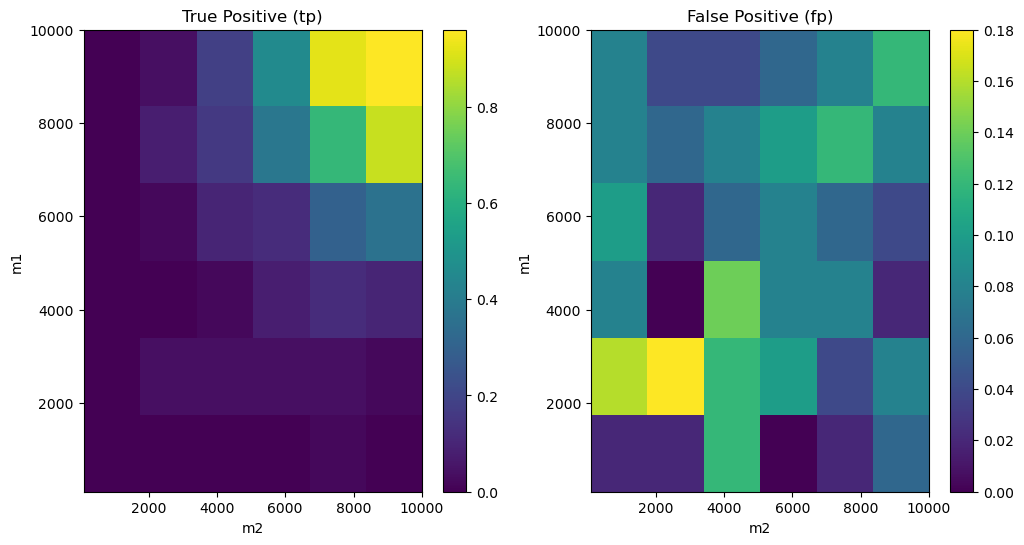

In [23]:
tp_matrix = np.zeros((len(m1_values), len(m2_values)))
fp_matrix = np.zeros((len(m1_values), len(m2_values)))

for row in to_plot:
    m1, m2, tp, fp = row
    i = m1_values.index(m1)
    j = m2_values.index(m2)
    tp_matrix[i, j] = tp
    fp_matrix[i, j] = fp


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

im1 = axs[0].imshow(tp_matrix, extent=[min(m2_values), max(m2_values), min(m1_values), max(m1_values)], aspect='auto', origin='lower')
axs[0].set_title('True Positive (tp)')
axs[0].set_xlabel('m2')
axs[0].set_ylabel('m1')
fig.colorbar(im1, ax=axs[0])

im2 = axs[1].imshow(fp_matrix, extent=[min(m2_values), max(m2_values), min(m1_values), max(m1_values)], aspect='auto', origin='lower')
axs[1].set_title('False Positive (fp)')
axs[1].set_xlabel('m2')
axs[1].set_ylabel('m1')
fig.colorbar(im2, ax=axs[1])

plt.show()

Видим что True Positive появляется при увеличении размеры выборки, а FP это от шума и случайности, так что нет зависимости на графике

### Пункт г) 

Когда признаки не имеют нормального распределения можно использовать критерий Манна-Уитни (U-критерий) для двух независимых выборок. Вроде этот метод не предполагает нормальности распределения. Дополнительно можно использовать ту же поправку Бенджамини-Хохберга.

In [28]:
from scipy.stats import mannwhitneyu

statistic, p_value = mannwhitneyu(X0, X1)
print("Mann-Whitney U Test Statistic:", statistic)
print("P-value:", p_value)


Mann-Whitney U Test Statistic: [5406. 4325. 5405. ... 5111. 5346. 4710.]
P-value: [0.32178609 0.09933917 0.32298087 ... 0.78716451 0.39856276 0.47934212]


## Задача 5

### часть а) Метод главных компонент
Метод главных компонент (Principal Component Analysis, PCA) - это статистический метод, используемый для уменьшения размерности данных и выявления основных закономерностей в данных. Он решает задачу снижения размерности, сохраняя при этом максимально возможную информацию, путем представления данных в новой системе координат, где первая ось направлена в сторону наибольшей дисперсии данных, вторая ось - в сторону второй по величине дисперсии и так далее.  
Основные задачи PCA включают уменьшение количества признаков с сохранением большей части информации, выявление скрытых закономерностей, устранение шума и мультиколлинеарности, сжатие данных и предобработку для других алгоритмов.

### часть б) Результат применения

Для применения PCA нам нужно найти собственные вектора и собственные значения ковариационной матрицы признаков:

1. Ковариационная матрица: 
   
   Ковариационная матрица признаков определяется так (центрирование не нужно из-за нулевых средних)  
   
   $$ S_X = \frac{1}{m} X^T X. $$

   Поскольку каждый столбец матрицы $ X $ — это независимые признаки, распределенные нормально, ковариационная матрица будет приближаться к
   
   $$ S_X \approx \sigma^2 I_n, $$
   
   где $ I_n $ — единичная матрица размера $ n \times n $, а $ \sigma^2 $ — дисперсия.

2. Собственные значения и вектора:
   
   Так как $ S_X $ пропорциональна единичной матрице, собственные вектора ковариационной матрицы будут совпадать с ортогональными осями пространства признаков, а все собственные значения будут равны $ \sigma^2 $. То есть все главные компоненты будут одинаково важны и не будут упорядочены по значимости.

   То есть дисперсия итак максимальна по всемм направлениям и метод PCA не будет ничего делать.

### часть в) зашумлённая копия признака + шкалированный признак

1. Ожидаемая ковариационная матрица:

   Ковариационная матрица $ S_X $ будет представлять собой сумму ковариаций зашумленных копий признака $ \chi_1 $ и шкалированного признака $ \chi_2 $. Так как $ \chi_1 $ и $ \chi_2 $ независимы, ковариационная матрица примет вид:
   
   $$ S_X = \frac{1}{m} X^T X \approx \sigma_1^2 I_{n-1} + \kappa^2 \sigma_2^2, $$

   где $ \sigma_1^2 $ — дисперсия зашумленных копий признака $ \chi_1 $, а $ \kappa^2 \sigma_2^2 $ — дисперсия шкалированного признака $ \chi_2 $.

2. Первая главная компонента:

   Если $ \kappa $ велико, то основная вариация в данных будет объясняться признаком $ \chi_2 $, и первая главная компонента будет близка к направлению $ \chi_2 $. То есть, первая главная компонента будет соответствовать признаку $ \chi_2 $ с весом $ \kappa $.

3. Ожидаемая доля объясненной дисперсии:

   Ожидаемая доля дисперсии, объясненная первой главной компонентой, определяется как отношение дисперсии этой компоненты к общей дисперсии:

   $$ \text{Explained Variance Ratio} = \frac{\kappa^2 \sigma_2^2}{(n-1)\sigma_1^2 + \kappa^2 \sigma_2^2}. $$

   При больших значениях $ \kappa $, доля объясненной дисперсии стремится к 1, так как $ \kappa^2 \sigma_2^2 $ доминирует над $ (n-1) \sigma_1^2 $.


#### Практический вывод:

Когда коэффициент шкалирования $ \kappa $ велик, основная часть дисперсии данных объясняется всего одним признаком (шкалированным), что указывает на сильную доминирующую компоненту в данных. В таких ситуациях PCA эффективно выявляет эту доминирующую компоненту, позволяя значительно упростить описание данных.



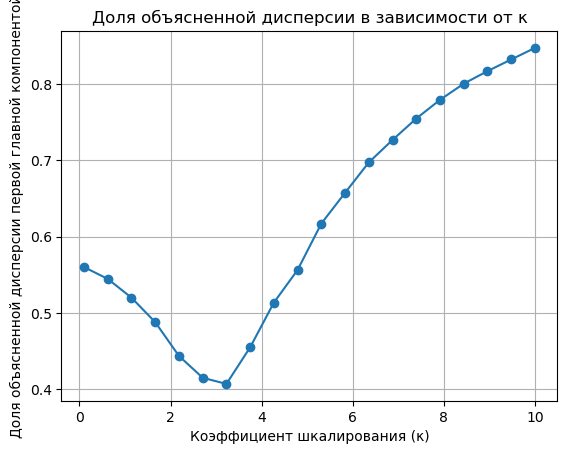

In [8]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Функция для генерации матрицы X и вычисления главных компонент
def generate_X_and_pca(m, n, kappa):
    # Генерация признаков
    chi_1 = np.random.randn(m, 1)  # Признак χ1 (N(0, I_m))
    chi_2 = np.random.randn(m, 1)  # Признак χ2 (N(0, I_m))
    epsilons = np.random.randn(m, n-1)  # Шум для копий χ1

    # Матрица X: зашумленные копии χ1 и шкалированный χ2
    X = np.hstack([chi_1 + epsilons, kappa * chi_2])

    # Применение PCA
    pca = PCA()
    pca.fit(X)

    # Первая главная компонента и доля объясненной дисперсии
    first_component = pca.components_[0]
    explained_variance_ratio = pca.explained_variance_ratio_[0]

    return first_component, explained_variance_ratio

# Сэмплирование и визуализация результатов для разных значений kappa
def sample_pca_for_different_kappas(m, n, kappas, num_samples=100):
    explained_variances = []

    for kappa in kappas:
        variance_sum = 0
        for _ in range(num_samples):
            _, explained_variance_ratio = generate_X_and_pca(m, n, kappa)
            variance_sum += explained_variance_ratio

        # Средняя доля объясненной дисперсии для текущего значения kappa
        avg_explained_variance = variance_sum / num_samples
        explained_variances.append(avg_explained_variance)

    return explained_variances

# Параметры
m = 100  # Число объектов
n = 10   # Число признаков
kappas = np.linspace(0.1, 10, 20)  # Значения κ

# Выполнение сэмплирования
explained_variances = sample_pca_for_different_kappas(m, n, kappas)

# Визуализация результатов
plt.plot(kappas, explained_variances, marker='o')
plt.xlabel('Коэффициент шкалирования (κ)')
plt.ylabel('Доля объясненной дисперсии первой главной компонентой')
plt.title('Доля объясненной дисперсии в зависимости от κ')
plt.grid(True)
plt.show()


Для выполнения сэмплирования и вычисления первой главной компоненты матрицы \( X \) и доли объясненной дисперсии в зависимости от коэффициента шкалирования \( \kappa \), мы можем использовать Python и библиотеку `numpy` для генерации данных, а также `sklearn` для выполнения PCA.

### Шаги:
1. Создадим матрицу \( X \) с зашумленными копиями признака \( \chi_1 \) и шкалированным признаком \( \chi_2 \).
2. Применим метод PCA к матрице \( X \) для нахождения главных компонент.
3. Вычислим долю объясненной дисперсии первой главной компонентой.
4. Проведем сэмплирование для различных значений \( \kappa \).

### Код:

```python
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Функция для генерации матрицы X и вычисления главных компонент
def generate_X_and_pca(m, n, kappa):
    # Генерация признаков
    chi_1 = np.random.randn(m, 1)  # Признак χ1 (N(0, I_m))
    chi_2 = np.random.randn(m, 1)  # Признак χ2 (N(0, I_m))
    epsilons = np.random.randn(m, n-1)  # Шум для копий χ1

    # Матрица X: зашумленные копии χ1 и шкалированный χ2
    X = np.hstack([chi_1 + epsilons, kappa * chi_2])

    # Применение PCA
    pca = PCA()
    pca.fit(X)

    # Первая главная компонента и доля объясненной дисперсии
    first_component = pca.components_[0]
    explained_variance_ratio = pca.explained_variance_ratio_[0]

    return first_component, explained_variance_ratio

# Сэмплирование и визуализация результатов для разных значений kappa
def sample_pca_for_different_kappas(m, n, kappas, num_samples=100):
    explained_variances = []

    for kappa in kappas:
        variance_sum = 0
        for _ in range(num_samples):
            _, explained_variance_ratio = generate_X_and_pca(m, n, kappa)
            variance_sum += explained_variance_ratio

        # Средняя доля объясненной дисперсии для текущего значения kappa
        avg_explained_variance = variance_sum / num_samples
        explained_variances.append(avg_explained_variance)

    return explained_variances

# Параметры
m = 100  # Число объектов
n = 10   # Число признаков
kappas = np.linspace(0.1, 10, 20)  # Значения κ

# Выполнение сэмплирования
explained_variances = sample_pca_for_different_kappas(m, n, kappas)

# Визуализация результатов
plt.plot(kappas, explained_variances, marker='o')
plt.xlabel('Коэффициент шкалирования (κ)')
plt.ylabel('Доля объясненной дисперсии первой главной компонентой')
plt.title('Доля объясненной дисперсии в зависимости от κ')
plt.grid(True)
plt.show()
```

### Описание кода:
1. **`generate_X_and_pca`** — функция для генерации матрицы \( X \) на основе нормальных распределений и применения PCA. Возвращает первую главную компоненту и долю объясненной дисперсии.
2. **`sample_pca_for_different_kappas`** — функция для сэмплирования. Для каждого значения \( \kappa \) проводится несколько экспериментов и вычисляется средняя доля объясненной дисперсии.
3. **График** — строится график зависимости доли объясненной дисперсии от коэффициента шкалирования \( \kappa \).

### Практический вывод:
- При увеличении \( \kappa \), доля объясненной дисперсии первой главной компонентой увеличивается. Это связано с тем, что шкалированный признак \( \chi_2 \) начинает доминировать над зашумленными копиями признака \( \chi_1 \).
- В ситуациях, когда один признак имеет гораздо большее влияние на данные (большой коэффициент \( \kappa \)), метод PCA эффективно выявляет этот признак и выделяет его как первую главную компоненту.

График показывает зависимость доли объясненной дисперсии первой главной компонентой от коэффициента шкалирования \( \kappa \). Анализируем результаты:

1. **Малые значения \( \kappa \) (около 0):**
   - При небольших значениях \( \kappa \), признак \( \chi_2 \) оказывает малое влияние, и доля объясненной дисперсии распределяется среди зашумленных копий признака \( \chi_1 \). Это видно по тому, что доля объясненной дисперсии находится около 0.6 и постепенно уменьшается.

2. **Минимум на графике (около \( \kappa \approx 2-4 \)):**
   - На этом участке доля объясненной дисперсии падает до минимума, так как влияние признака \( \chi_2 \) ещё недостаточно велико, а шумовые компоненты признаков \( \chi_1 \) начинают вносить большее разнообразие в данные. Это приводит к снижению объясненной дисперсии первой главной компонентой.

3. **Увеличение \( \kappa \):**
   - С ростом \( \kappa \) признак \( \chi_2 \) становится доминирующим, так как его вклад увеличивается из-за масштаба \( \kappa \). Это приводит к тому, что метод PCA начинает выделять \( \chi_2 \) в качестве первой главной компоненты, и объясненная дисперсия начинает расти. На больших значениях \( \kappa \) она стабилизируется ближе к 0.8.

### Практический вывод:
- Когда коэффициент шкалирования \( \kappa \) мал, дисперсия распределена среди шумовых копий признака \( \chi_1 \), и первая главная компонента отражает эти копии. 
- С увеличением \( \kappa \), \( \chi_2 \) начинает доминировать, и первая главная компонента все больше отражает этот признак.
- Это показывает, что PCA может корректно идентифицировать направление с максимальной дисперсией, даже если оно зависит от масштаба данных, и объясненная дисперсия первой компонентой будет расти с увеличением доминирующего признака.